In [413]:
pip install keras_preprocessing


Note: you may need to restart the kernel to use updated packages.


In [414]:
pip  install matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [415]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [416]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt

In [417]:
os.system("rm ./simulation/I.txt")

0

In [418]:
sizt = 256
ima = img.load_img(
    "images/hxh.jpg",
    target_size=(sizt,sizt),
    color_mode="grayscale",

)

In [419]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

In [420]:
import numpy as np

In [421]:
array = img.img_to_array(ima)
k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int(j[0]))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [422]:
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int("0b"+integ,2)
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -(int("0b"+integ,2)+1)
    # print(integ,'h')

    return [a]

In [423]:
out = open("./simulation/IxKernel.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [424]:
out2 = open("./simulation/maxIxKernelPooling.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat,i.split())))


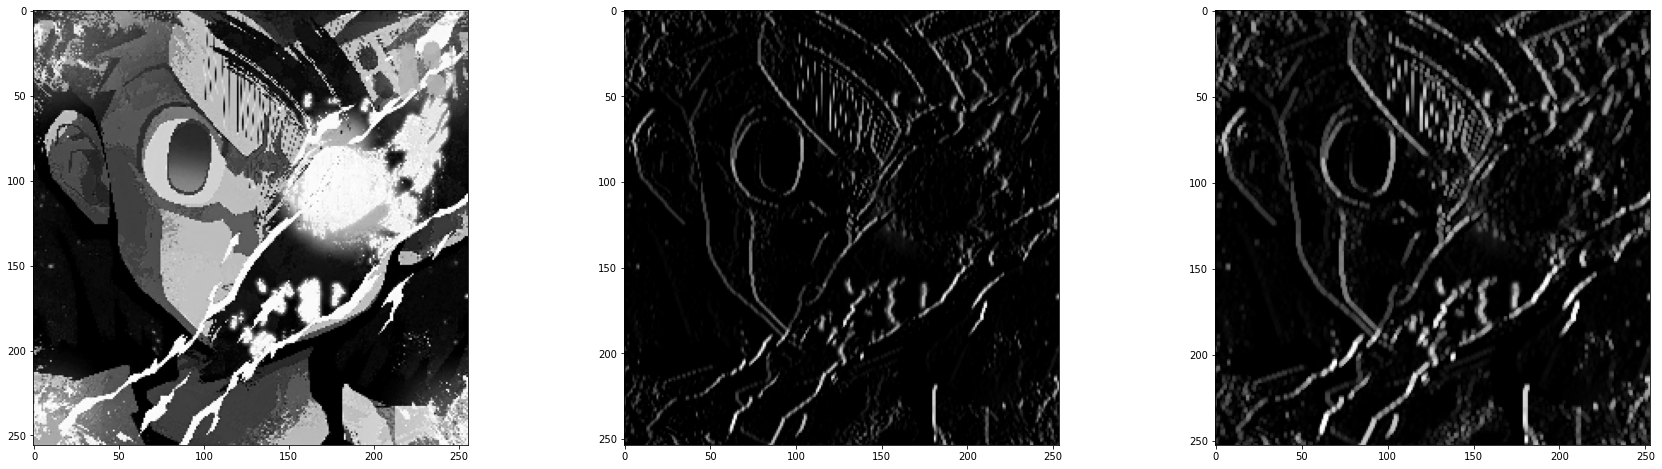

In [425]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(m1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(m2,cmap="gray")
plt.show()


In [426]:
os.system("rm ./images/preprocessamento.jpg")
os.system("rm ./images/posprocessamento.jpg")

img.save_img("./images/preprocessamento.jpg",array)
img.save_img("./images/posprocessamento.jpg",m1)
img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


hex(1)

In [427]:
hex(1)

'0x1'